In [1]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.colors import LogNorm, SymLogNorm

from utils import *

In [2]:
from geom import pixel_maps_from_geometry_file, apply_geom_ij_yx
cx, cy = pixel_maps_from_geometry_file('../data/agipd_taw9_oy2_1050addu_hmg5.geom')

In [3]:
eV = 1.6021766208e-19
hc = 6.6260700400E-34 * 299792458

L = 5.465
lx = 200e-6
ly = 200e-6
Eph = 9200


lmd = hc / Eph / eV
lmd *= 1e10
lmd2 = lmd*lmd
print(lmd)

1.347654319526165


In [4]:
# 3rd
b1, (x0,y0) = read_reduced_bg('../data/bg/bg-s3.h5')
ri1,vi1,di1,si1=make_indexed_rep(cx-x0,cy-y0,b1.bg,b1.bg2,b1.sg)
ri2,vi2,di2,si2=make_indexed_rep(cx-x0,cy-y0,b1.bl,b1.bl2,b1.sl)
# 4rd
b2, (x0,y0) = read_reduced_bg('../data/bg//bg-s4.h5')
ri3,vi3,di3,si3=make_indexed_rep(cx-x0,cy-y0,b2.bg,b2.bg2,b2.sg,True)
ri4,vi4,di4,si4=make_indexed_rep(cx-x0,cy-y0,b2.bl,b2.bl2,b2.sl,True)


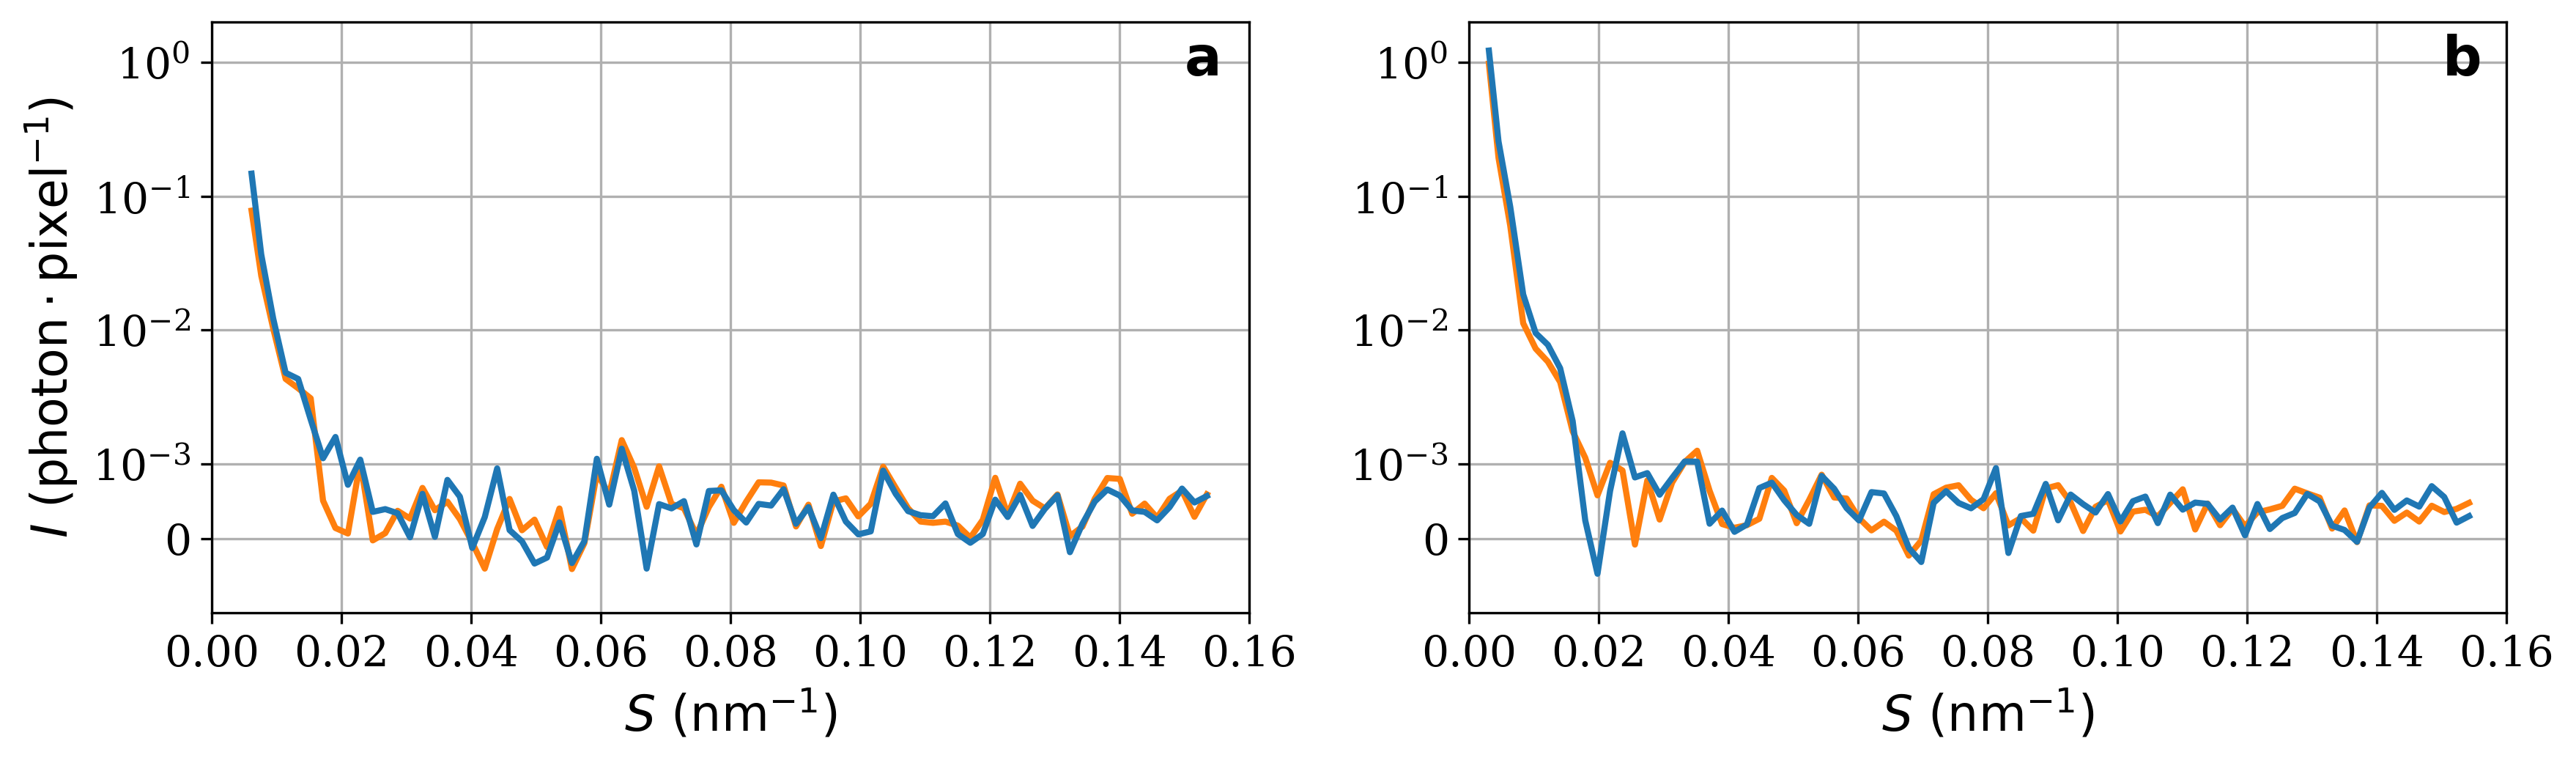

In [5]:
qr1, vr1, sr1 = rdf(ri1, vi1, si1, 5, [lx/L, ly/L], lmd) 
qr2, vr2, sr2 = rdf(ri2, vi2, si2, 5, [lx/L, ly/L], lmd) 
qr3, vr3, sr3 = rdf(ri3, vi3, si3, 5, [lx/L, ly/L], lmd) 
qr4, vr4, sr4 = rdf(ri4, vi4, si4, 5, [lx/L, ly/L], lmd)

plt.rc('text', usetex=False)
plt.rc('font', family='serif', size=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=16)
plt.rc('axes', titlesize=16)

fig = plt.figure(figsize=(12,5/16*12), tight_layout=True, dpi=300)
ax = fig.add_subplot(1,2,1)
ax.plot(qr2*10, vr2/64, 'C1', lw=2)
ax.plot(qr1*10, vr1/64,'C0', lw=2)
ax.grid(True)
ax.set_yscale('symlog', linthreshy=1e-3, linscaley=0.5)
ax.set_xlabel('$S\ (\mathrm{nm}^{-1})$')
ax.set_ylabel('$I\ (\mathrm{photon}\cdot \mathrm{pixel}^{-1})$')
ax.text(.15, 0.8, '$\mathbf{a}$', fontsize=18)
ax.set_xlim(0,0.16)
ax.set_ylim(-1e-3,2)

ax = fig.add_subplot(1,2,2)
ax.plot(qr4*10, vr4/64, 'C1', lw=2)
ax.plot(qr3*10, vr3/64, 'C0', lw=2)
ax.grid(True)
ax.set_yscale('symlog', linthreshy=1e-3, linscaley=0.5)
ax.set_xlabel('$S\ (\mathrm{nm}^{-1})$')
ax.text(.15, 0.8, '$\mathbf{b}$', fontsize=18)
ax.set_xlim(0,0.16)
ax.set_ylim(-1e-3,2)
plt.savefig('pdf/figure_3.pdf')
plt.savefig('eps/figure_3.eps')
plt.show()

In [6]:
# 3rd
spr_b1, (x0, y0) = read_reduced_pw('../data/bg//pw_ircl_1.h5')
b = spr_b1
spr1_ri,spr1_vi,spr1_di,spr1_si=make_indexed_rep(
    cx-x0,cy-y0,b.pw-b.bg,
    np.sqrt(b.bg2*b.bg2+b.pw2*b.pw2),
    np.sqrt(b.bg2*b.bg2+b.pw2*b.pw2)
)

mimi_b1, (x0, y0) = read_reduced_pw('../data/bg/pw_mimiv_1.h5')
b = mimi_b1
mimi1_ri,mimi1_vi,mimi1_di,mimi1_si=make_indexed_rep(
    cx-x0,cy-y0,b.pw-b.bg,
    np.sqrt(b.bg2*b.bg2+b.pw2*b.pw2),
    np.sqrt(b.bg2*b.bg2+b.pw2*b.pw2)
)
# 4th
spr_b2, (x0, y0) = read_reduced_pw('../data/bg/pw_ircl_2.h5')
b = spr_b2
spr2_ri,spr2_vi,spr2_di,spr2_si=make_indexed_rep(
    cx-x0,cy-y0,b.pw-b.bg,
    np.sqrt(b.bg2*b.bg2+b.pw2*b.pw2),
    np.sqrt(b.bg2*b.bg2+b.pw2*b.pw2)
)
mimi_b2, (x0, y0) = read_reduced_pw('../data/bg/pw_mimiv_2.h5')
b = mimi_b2
mimi2_ri,mimi2_vi,mimi2_di,mimi2_si=make_indexed_rep(
    cx-x0,cy-y0,(b.pw-b.bg),
    np.sqrt(b.bg2*b.bg2+b.pw2*b.pw2),
    np.sqrt(b.bg2*b.bg2+b.pw2*b.pw2)
)
melb_b2, (x0, y0) = read_reduced_pw('../data/bg/pw_melbv_2.h5')
b = melb_b2
melb2_ri,melb2_vi,melb2_di,melb2_si=make_indexed_rep(
    cx-x0,cy-y0,(b.pw-b.bg),
    np.sqrt(b.bg2*b.bg2+b.pw2*b.pw2),
    np.sqrt(b.bg2*b.bg2+b.pw2*b.pw2)
)


In [7]:
spr_ri = np.vstack([spr1_ri, spr2_ri])
spr_vi = np.concatenate([spr1_vi, spr2_vi])
spr_si = np.concatenate([spr1_si, spr2_si])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


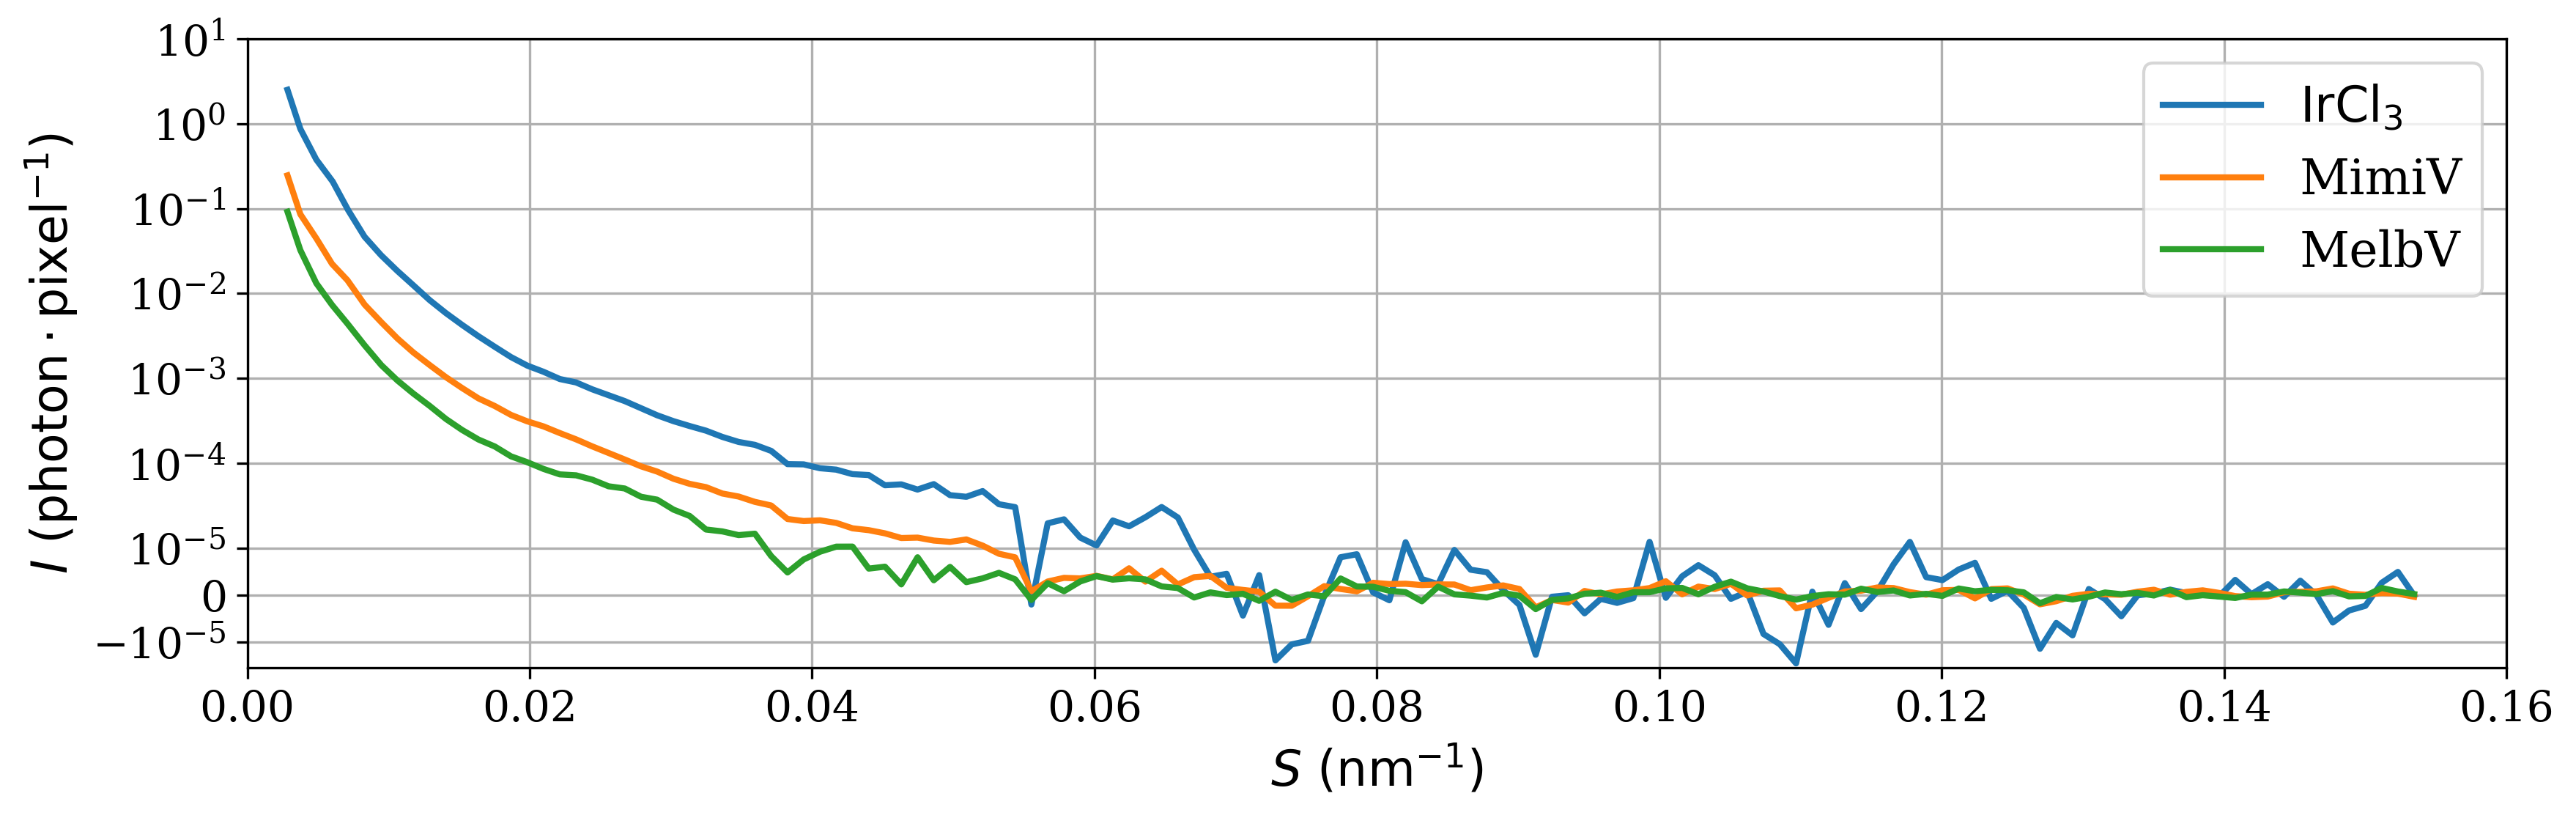

In [8]:
qr1, vr1, sr1 = rdf(spr_ri, spr_vi, spr_si, 3, [lx/L, ly/L], lmd) 
qr2, vr2, sr2 = rdf(mimi2_ri, mimi2_vi, mimi2_si, 3, [lx/L, ly/L], lmd) 
qr3, vr3, sr3 = rdf(melb2_ri, melb2_vi, melb2_si, 3, [lx/L, ly/L], lmd) 


plt.rc('text', usetex=False)
plt.rc('font', family='serif', size=16)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=16)
plt.rc('axes', titlesize=16)

fig = plt.figure(figsize=(12,4), tight_layout=True, dpi=300)
ax = fig.gca()
ax.plot(qr1*10, vr1/64,'C0', lw=2, label='$\mathrm{IrCl}_3$')
ax.plot(qr2*10, vr2/64,'C1', lw=2, label='MimiV')
ax.plot(qr3*10, vr3/64,'C2', lw=2, label='MelbV')

ax.legend()
ax.grid(True)
ax.set_yscale('symlog', linthreshy=1e-5, linscaley=0.5)
#ax.set_xscale('log')
ax.set_xlabel('$S\ (\mathrm{nm}^{-1})$')
ax.set_ylabel('$I\ (\mathrm{photon}\cdot \mathrm{pixel}^{-1})$')
#ax.text(.15, 0.8, '$\mathbf{a}$', fontsize=20)
ax.set_xlim(0,0.16)
ax.set_ylim(-2e-5,10)

plt.savefig('pdf/figure_6.pdf')
plt.savefig('eps/figure_6.eps')

plt.show()

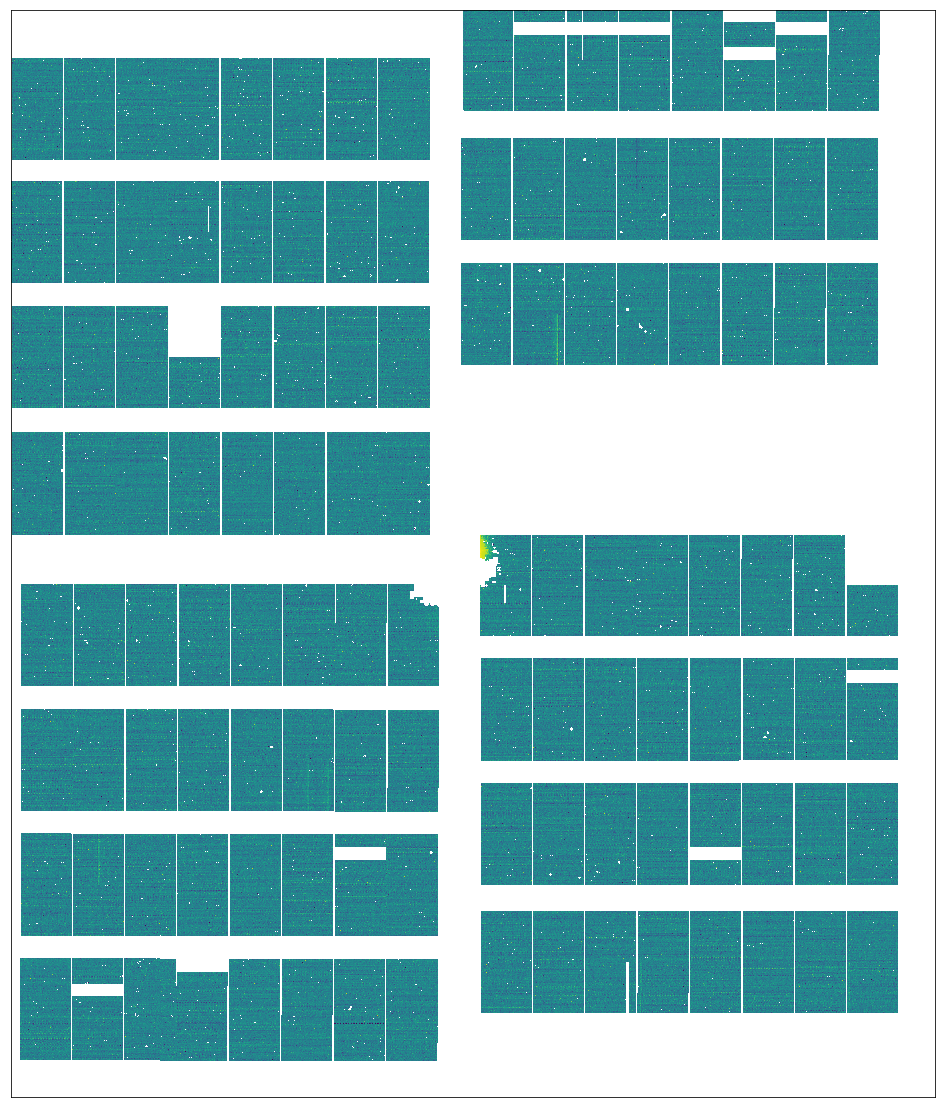

In [9]:
b2, (x0,y0) = read_reduced_bg('../data/bg/bg-s4.h5')
plot_bg_full(b2, cx-x0, cy-y0)